In [ ]:
# REGRESIÓN LOGISTICA
import pandas as pd

datos = pd.read_csv("titanic.csv")

In [ ]:
datos.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
datos.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: xlabel='Survived', ylabel='count'>

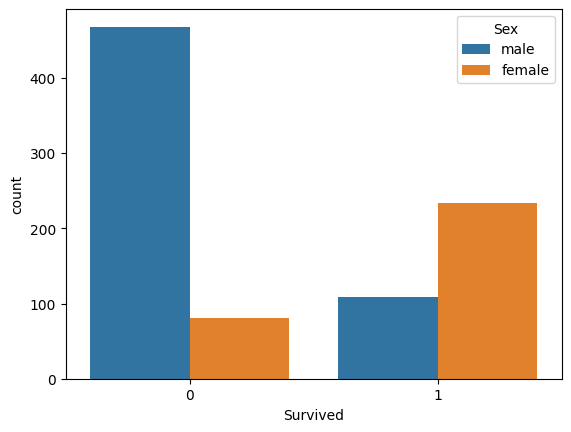

In [ ]:
import seaborn as sb
sb.countplot(x="Survived", data=datos, hue="Sex")

<Axes: xlabel='Survived', ylabel='count'>

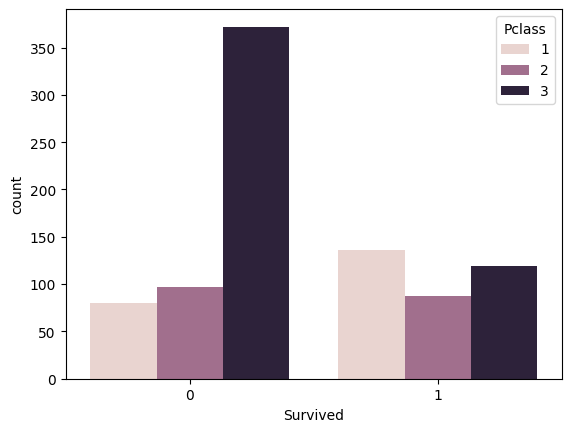

In [ ]:
sb.countplot(x="Survived", data=datos, hue="Pclass")

In [ ]:
datos.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


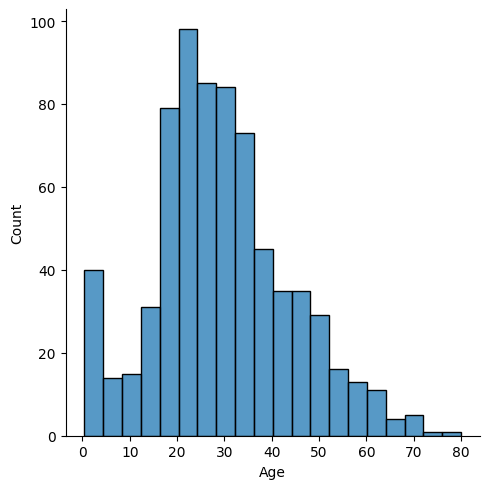

In [ ]:
sb.displot(x="Age", data=datos)

In [ ]:
datos["Age"].mean()

,Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0
...,...
886,27.0
887,19.0
888,NaN
889,26.0


In [ ]:
datos["Age"] = datos["Age"].fillna(datos["Age"].mean())
datos["Age"]

,Age
0,22.000000
1,38.000000
2,26.000000
3,35.000000
4,35.000000
...,...
886,27.000000
887,19.000000
888,29.699118
889,26.000000


In [ ]:
datos.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
datos = datos.drop(["Cabin"],axis=1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


In [ ]:
datos["Embarked"].value_counts()

,count
Embarked,
S,644
C,168
Q,77


In [ ]:
datos = datos.dropna()

In [ ]:
datos.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
datos = datos.drop(["PassengerId", "Name", "Ticket"], axis=1)

In [ ]:
datos = datos.drop(["Cabin"], axis=1)

In [ ]:
datos

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,1,1,female,38.0,1,0,71.2833,C
3,1,1,female,35.0,1,0,53.1000,S
6,0,1,male,54.0,0,0,51.8625,S
10,1,3,female,4.0,1,1,16.7000,S
11,1,1,female,58.0,0,0,26.5500,S
...,...,...,...,...,...,...,...,...
871,1,1,female,47.0,1,1,52.5542,S
872,0,1,male,33.0,0,0,5.0000,S
879,1,1,female,56.0,0,1,83.1583,C
887,1,1,female,19.0,0,0,30.0000,S


In [ ]:
dummies_sex = pd.get_dummies(datos["Sex"], dtype=int)

In [ ]:
dummies_sex

,female,male
1,1,0
3,1,0
6,0,1
10,1,0
11,1,0
...,...,...
871,1,0
872,0,1
879,1,0
887,1,0


In [ ]:
dummies_sex = pd.get_dummies(datos["Sex"],drop_first=True, dtype=int)

KeyError: 'Sex'

In [ ]:
dummies_embarked=pd.get_dummies(datos["Embarked"],  dtype=int)

In [ ]:
datos

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,1,1,female,38.0,1,0,71.2833,C
3,1,1,female,35.0,1,0,53.1000,S
6,0,1,male,54.0,0,0,51.8625,S
10,1,3,female,4.0,1,1,16.7000,S
11,1,1,female,58.0,0,0,26.5500,S
...,...,...,...,...,...,...,...,...
871,1,1,female,47.0,1,1,52.5542,S
872,0,1,male,33.0,0,0,5.0000,S
879,1,1,female,56.0,0,1,83.1583,C
887,1,1,female,19.0,0,0,30.0000,S


In [ ]:
datos.join(dummies_sex)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,male
1,1,1,female,38.0,1,0,71.2833,C,0
3,1,1,female,35.0,1,0,53.1000,S,0
6,0,1,male,54.0,0,0,51.8625,S,1
10,1,3,female,4.0,1,1,16.7000,S,0
11,1,1,female,58.0,0,0,26.5500,S,0
...,...,...,...,...,...,...,...,...,...
871,1,1,female,47.0,1,1,52.5542,S,0
872,0,1,male,33.0,0,0,5.0000,S,1
879,1,1,female,56.0,0,1,83.1583,C,0
887,1,1,female,19.0,0,0,30.0000,S,0


In [ ]:
datos = datos.drop(["Sex"], axis=1)

In [ ]:
datos = datos.join(dummies_embarked)
datos.drop(["Embarked"], axis=1)

,Survived,Pclass,Age,SibSp,Parch,Fare,C,Q,S
1,1,1,38.0,1,0,71.2833,1,0,0
3,1,1,35.0,1,0,53.1000,0,0,1
6,0,1,54.0,0,0,51.8625,0,0,1
10,1,3,4.0,1,1,16.7000,0,0,1
11,1,1,58.0,0,0,26.5500,0,0,1
...,...,...,...,...,...,...,...,...,...
871,1,1,47.0,1,1,52.5542,0,0,1
872,0,1,33.0,0,0,5.0000,0,0,1
879,1,1,56.0,0,1,83.1583,1,0,0
887,1,1,19.0,0,0,30.0000,0,0,1


In [ ]:
from sklearn.linear_model import LogisticRegression

modelo = LogisticRegression(max_iter=1000)


In [ ]:
X = datos.drop(["Survived"], axis=1)
y = datos["Survived"]

In [ ]:
datos = datos.drop(["Embarked"], axis=1)

In [ ]:
datos = datos.join(dummies_sex)

In [ ]:
datos.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,C,Q,S
1,1,1,38.0,1,0,71.2833,1,0,0
3,1,1,35.0,1,0,53.1000,0,0,1
6,0,1,54.0,0,0,51.8625,0,0,1
10,1,3,4.0,1,1,16.7000,0,0,1
11,1,1,58.0,0,0,26.5500,0,0,1


In [ ]:
X

,Pclass,Age,SibSp,Parch,Fare,C,Q,S,male
1,1,38.0,1,0,71.2833,1,0,0,0
3,1,35.0,1,0,53.1000,0,0,1,0
6,1,54.0,0,0,51.8625,0,0,1,1
10,3,4.0,1,1,16.7000,0,0,1,0
11,1,58.0,0,0,26.5500,0,0,1,0
...,...,...,...,...,...,...,...,...,...
871,1,47.0,1,1,52.5542,0,0,1,0
872,1,33.0,0,0,5.0000,0,0,1,1
879,1,56.0,0,1,83.1583,1,0,0,0
887,1,19.0,0,0,30.0000,0,0,1,0


In [ ]:
y

,Survived
1,1
3,1
6,0
10,1
11,1
...,...
871,1
872,0
879,1
887,1


In [ ]:
modelo.fit(X,y)

LogisticRegression(max_iter=1000)

In [ ]:
y_est = modelo.predict(X)

In [ ]:
from sklearn.metrics import confusion_matrix

pd.DataFrame(confusion_matrix(y, y_est), columns=["Pred: No", "Pred: Si"],
             index=["Real: No", "Real: Si"])

,Pred: No,Pred: Si
Real: No,49,19
Real: Si,21,113
